In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

: 

In [ ]:
# Step 1: Create the dataset
data = pd.read_csv('ID3.csv')
print(data)

: 

In [14]:
# Step 2: Separate input and output
X = data.drop('Goes', axis=1)  # input features
y = data['Goes']               # target column

In [15]:
# Step 3: Convert categorical data to numbers
X_encoded = pd.get_dummies(X)
print(X_encoded)

   Time_ Evening  Time_ Morning  Weather_Rainy  Weather_Sunny  \
0          False           True          False           True   
1           True          False           True          False   
2          False           True          False           True   
3           True          False          False           True   

   Temperature_Cold  Temperature_Moderate  Temperature_Warm  Company_No  \
0             False                 False              True       False   
1              True                 False             False        True   
2             False                  True             False       False   
3              True                 False             False       False   

   Company_Yes  Humidity_High  Humidity_Mild  Humidity_Normal  Wind_Normal  \
0         True          False           True            False        False   
1        False          False           True            False         True   
2         True          False          False             True   

In [16]:
# Step 4: Train the decision tree using entropy (ID3)
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_encoded, y)

DecisionTreeClassifier(criterion='entropy')

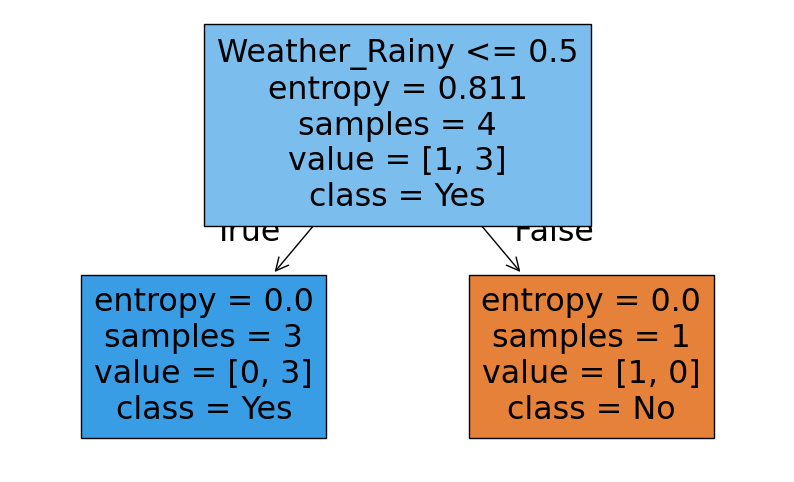

In [17]:
# Step 5: Show the decision tree
plt.figure(figsize=(10,6))
tree.plot_tree(model, feature_names=X_encoded.columns, class_names=model.classes_, filled=True)
plt.show()

In [18]:
# Step 6: Predict for a new example
new_data = pd.DataFrame({
    'Time': ['Morning'],
    'Weather': ['Sunny'],
    'Temperature': ['Cold'],
    'Company': ['Yes'],
    'Humidity': ['Normal'],
    'Wind': ['Strong']
})


In [19]:
# Convert new data like before
new_encoded = pd.get_dummies(new_data)
new_encoded = new_encoded.reindex(columns=X_encoded.columns, fill_value=0)

In [20]:
# Predict
prediction = model.predict(new_encoded)
print("Will the person go out?", prediction[0])

Will the person go out? Yes
